# **Prepared by** 

**Hasan Hüseyin BOYRAZ <br>
Hasan Hüseyin DURAN**

# **Global Ai Project** 

Medical Cost Personal Datasets
https://www.kaggle.com/datasets/mirichoi0218/insurance?datasetId=13720

## 2. Importing Required Libraries

In [1]:
import numpy  as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
df = pd.read_csv(url, sep=',')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Yukarıda analizini yapacağımız veri setini okuttuk. <br> 
* <span style="color:#ADD8E6"> **age :** </span> yaş 
* <span style="color:#ADD8E6">**sex :**</span> cinsiyet 
* <span style="color:#ADD8E6">**bmi :**</span> vicut kitle indexi <br>
&nbsp; kilo ile boyun karesinin oranı olarak hesaplanır <br>
&nbsp; <span style="color:red">**Zayıf (Underweight):**</span> BMI < 18.5 <br>
&nbsp; <span style="color:green">**Normal Kilolu (Normal Weight):**</span> 18.5 <= BMI < 24.9 <br>
&nbsp; <span style="color:red">**Fazla Kilolu (Overweight):**</span> 25 <= BMI < 29.9 <br>
&nbsp; <span style="color:red">**Obez (Obese):**</span><br>
&nbsp; <span style="color:red">**Obezite Sınıfı I:**</span> 30 <= BMI < 34.9 <br>
&nbsp; <span style="color:red">**Obezite Sınıfı II:**</span> 35 <= BMI < 39.9 <br>
&nbsp; <span style="color:red">**Obezite Sınıfı III:**</span> BMI >= 40 <br>
* <span style="color:#ADD8E6">**children :**</span> Sahip olunan çocuk sayısı
* <span style="color:#ADD8E6">**smoker :**</span> Sigara kullanma durumu
* <span style="color:#ADD8E6">**region :** </span> Oturulan coğrafi bölge
* <span style="color:#ADD8E6">**charges :**</span> masraflar

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Öncelikle veri setini tanımaya çalışmak çok önemlidir. Veri setimizdeki değişkenlerin olması gerektiği gibi tanımlandığını görmekteyiz. 
* Cinsiyet, bölge ve sigara içme durumları kategorik değişken olarak tanımlanmış. Herhangi bir problem gözükmüyor.
* non-null yani eksik değer gözükmüyor. 

In [4]:
df.shape

(1338, 7)

Rows ve columns sayılarımızı görüyoruz
* 1338 rows
* 7 columns

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


* Burdan edindiğimiz bilgilere göre veri setimizdeki topluluğumuzdaki insanların çoğu 1. obezite sınıfına giriyor diyebiliriz. 
* Topluluğun yaş ortalaması 39 olarak gözükmekte.
* Topluluğumuzdaki çocuk sayısı, birey sayısına yani gözlem sayısına oldukça yakın diyebiliriz.
* Masrafları incelediğimizde en fazla en az değerleri ve birey başına ortalama masrafı görüyoruz.

## 3. Perform An Exploratory Data Analysis

### ○ Examine the distribution of Bmi (Body Mass Index)

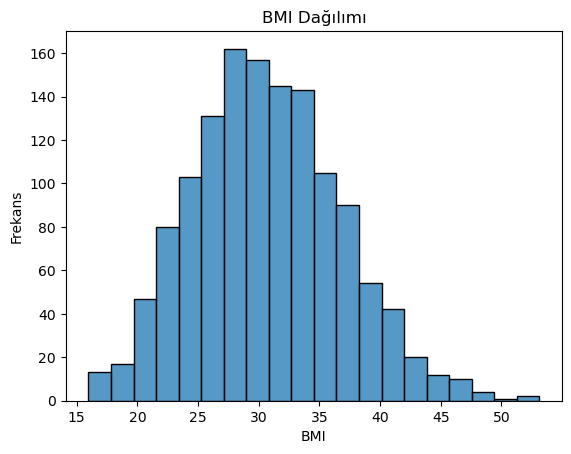

In [6]:
sns.histplot(data=df, x='bmi', bins=20)  # 20 aralık için histogram
plt.xlabel('BMI')
plt.ylabel('Frekans')
plt.title('BMI Dağılımı')
plt.show()

Yukarıdaki histogramda sayısal bir değişken olan BMİ değişkenimizin dağılımı görselleştirdik. <br>
x ekseninde vicut kütle indeksini ve y ekseninde ise frekansımızı gösteriyor. <br>
Bu dağılıma göre veri setimizdeki toplulukta en fazla kişinin 25-30 arasında bir BMİ'ye sahip olduğunu görebiliriz. **Yani kilolu sayısı çoğunluktadır.** 

<Axes: xlabel='age', ylabel='bmi'>

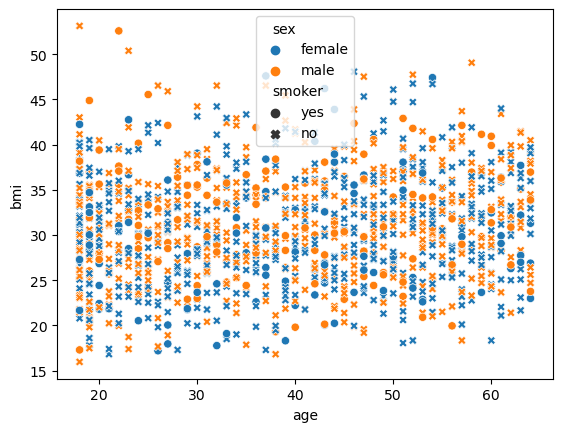

In [7]:
sns.scatterplot(x = "age", y = "bmi", hue = "sex", style = "smoker",data = df)

Yukarıdaki grafikte ise yaş ile vicut kitle indeksi arasındaki dağılıma bakmaya çalıştık. Bunları incelerken cinsiyet ve sigara kullanımı olan kategorik değişkenlerimizide dahil ettik incelememize.

<Axes: xlabel='age', ylabel='bmi'>

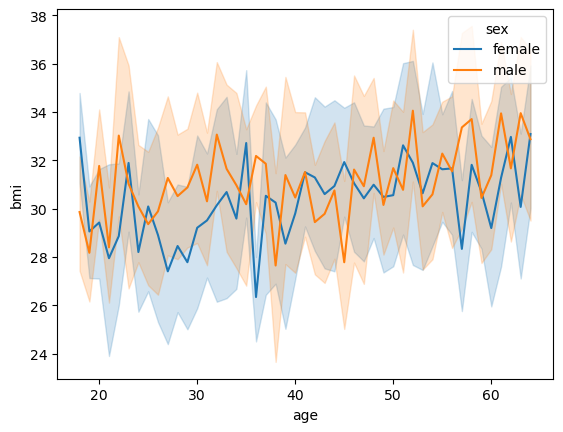

In [8]:
sns.lineplot(x = "age", y = "bmi", hue = "sex",data = df)

In [9]:
df.groupby(["age", "sex"])["bmi"].mean().unstack().head()

sex,female,male
age,,
18,32.930909,29.855139
19,29.051667,28.168143
20,29.421429,31.763333
21,27.944615,28.394667
22,28.859231,33.019000


Yukarıda yaş ve cinsiyete göre vicut indekslerini inceledik sonrasında groupby fonksiyonu ile sayısal değerlerinede baktık.

### ○ Examine the relationship between “smoker” and “charges”

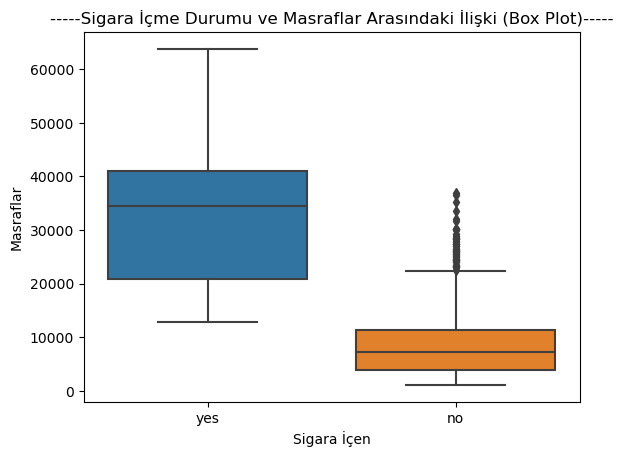

In [10]:
sns.boxplot(x="smoker", y="charges", data=df)
plt.xlabel('Sigara İçen')
plt.ylabel('Masraflar')
plt.title('-----Sigara İçme Durumu ve Masraflar Arasındaki İlişki (Box Plot)-----')
plt.show()

Yukarıda sigara içenlerin daha fazla sağlık masraflarına sahip olduğu gözükmektedir.

In [11]:
df.groupby("smoker")["charges"].mean().head()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

### ○ Examine the relationship between “smoker” and “region”.

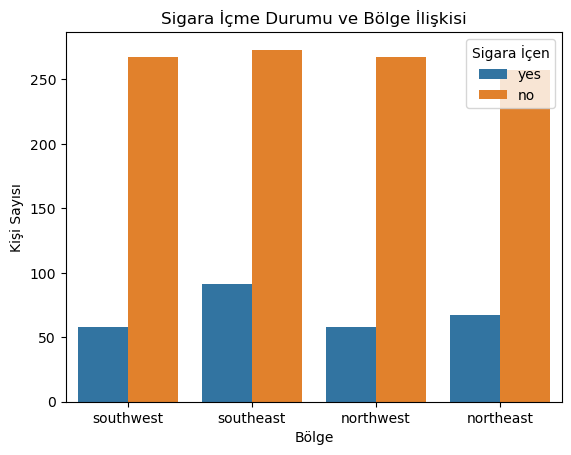

In [12]:
sns.countplot(x="region", hue="smoker", data=df)
plt.xlabel('Bölge')
plt.ylabel('Kişi Sayısı')
plt.title('Sigara İçme Durumu ve Bölge İlişkisi')
plt.legend(title="Sigara İçen")
plt.show()


Yukarıda baktığımız zaman en çok southeast bölgesinde sigara kullanıldığını ve genel olarak sigara kullanmayan kişi sayısının daha fazla olduğunu söyleyebiliriz.

<Axes: xlabel='region', ylabel='smoker'>

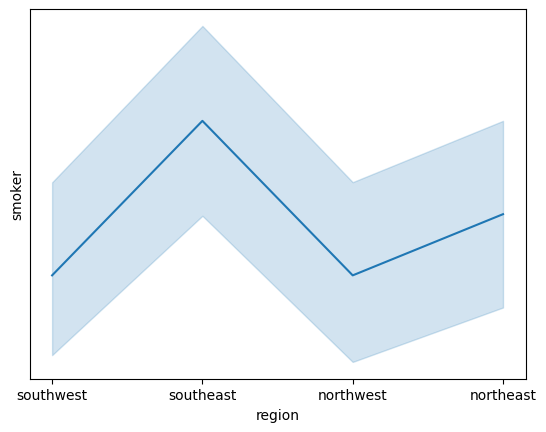

In [13]:
sns.lineplot(x = 'region',y = 'smoker',data = df)

### ○ Examine the relationship between “bmi” and “sex”.

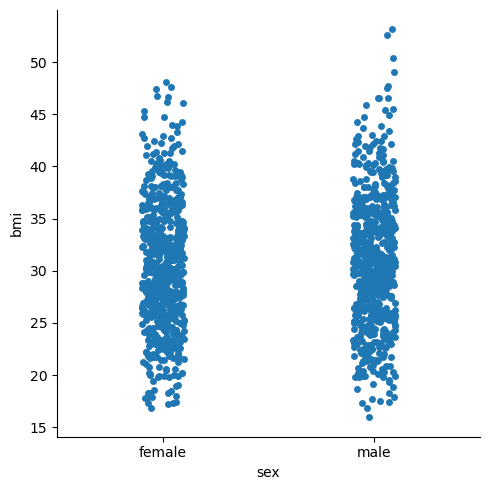

In [14]:
sns.catplot(x = 'sex',y = 'bmi',data = df)

<Axes: xlabel='sex', ylabel='bmi'>

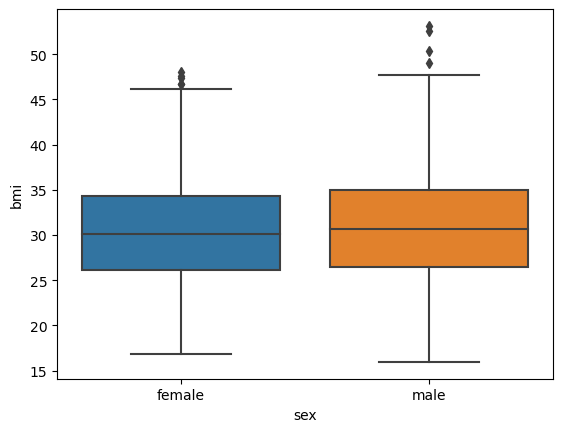

In [15]:
sns.boxplot(x = 'sex',y = 'bmi',data = df)

In [16]:
df.groupby("sex")["bmi"].mean().head()

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

### ○ Find the "region" with the most "children".

In [17]:
df.groupby("region")["children"].sum().head().sort_values(ascending=False)

region
southeast    382
northwest    373
southwest    371
northeast    339
Name: children, dtype: int64

En fazla çocuğa sahip olan bölgenin southeast olduğu gözükmekte

### ○ Examine the relationship between “age” and “bmi”.

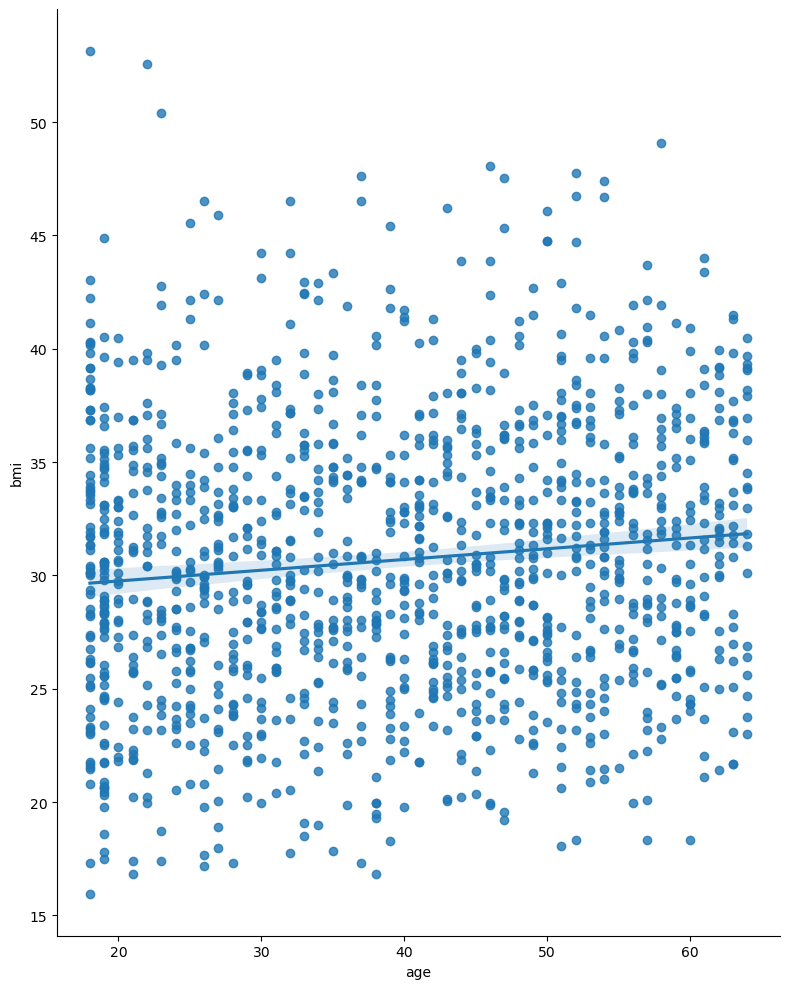

In [18]:
sns.lmplot(x="age", y="bmi", height=10, aspect=0.8,data = df)

Buradaki grafikten yaş arttıkça bmi'nin 30 un üzerine çıktığını yani insanların obez sınfına daha çok eğilimi olduğunu söyleyebiliriz.

In [86]:
df.groupby(["age","sex"])["bmi"].mean().head().unstack()

sex,female,male
age,,
18,32.930909,29.692917
19,29.051667,28.168143
20,29.421429,NaN


Yukarıda kadın ve erkeklerin ait oldukları yaşlara göre sahip olduğu ortalama bmi'lerini (vicut kütle indekslerini) görüyoruz.<br>


In [87]:
df_heatmap = df.pivot_table(index="age", columns="sex", values="bmi")
df_heatmap.head()

sex,female,male
age,,
18,32.930909,29.692917
19,29.051667,28.168143
20,29.421429,31.763333
21,27.944615,28.394667
22,28.859231,32.666333


<Axes: xlabel='sex', ylabel='age'>

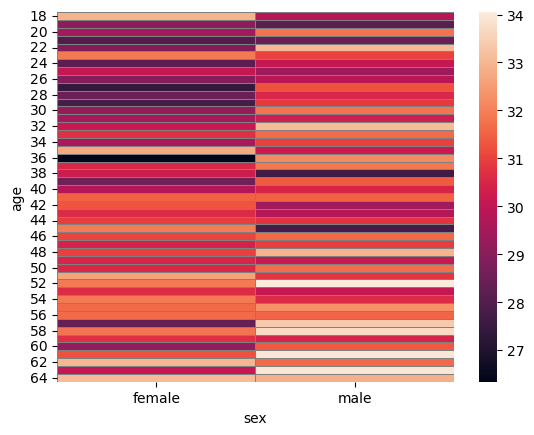

In [21]:
sns.heatmap(df_heatmap,linewidths=0.5, linecolor='gray')


Öncesinde pivot tablo oluşturduk ve daha sonrasında,
yaş ve cinsiyet ilişkisine göre ortalama bmi değerlerinin ısı haritasını çıkartttık. Bu sayede hangi yaş grubunun daha kilolu yada zayıf olduğunu daha rahat şekilde gözlemleyebiliyoruz.

### ○ Examine the relationship between “bmi” and “children”.

In [22]:
bins = [0, 18, 25, 30, 35, 100]  # Belirli aralıklar
labels = ['0-18 zayıf', '18-25 normal', '25-30 kilolu', '30-35 obez', '35++ aşırı obez']  # Aralık etiketleri

df['bmi_group'] = pd.cut(df['bmi'], bins=bins, labels=labels)

df.groupby(['bmi_group'])[['children']].sum()

,children
bmi_group,
0-18 zayıf,16
18-25 normal,260
25-30 kilolu,408
30-35 obez,448
35++ aşırı obez,333


Bmi değerlerine göre sahip olunan çocukları yada ortalamasını görmek pek mümkün olmaz çünkü bmi değeri çok sayıda eşsiz değerden oluşmakta bunun yerine bmi değerlerini belirli aralıklarda alarak bu aralıklardaki bmi değerine sahip bireylerin çocuk sayılarını veya kişi başına düşen ortalama çocuk sayısını hesaplamak daha mantıklı olur.<br><br>
Yukarıdaki örnekte, pd.cut() fonksiyonu ile "bmi" değerlerini belirli aralıklara böldük ve her bir aralığa bir kategori etiketi atadık. Ardından groupby ile bu yeni kategorilere göre gruplama yaparak toplam çocuk değerlerini hesapladık.

In [23]:
df.groupby(['bmi_group'])[['children']].describe()

children                                             
                   count      mean       std  min  25%  50%  75%  max
bmi_group                                                            
0-18 zayıf          15.0  1.066667  0.883715  0.0  0.0  1.0  2.0  2.0
18-25 normal       232.0  1.120690  1.256362  0.0  0.0  1.0  2.0  5.0
25-30 kilolu       386.0  1.056995  1.213288  0.0  0.0  1.0  2.0  5.0
30-35 obez         389.0  1.151671  1.220583  0.0  0.0  1.0  2.0  5.0
35++ aşırı obez    316.0  1.053797  1.154818  0.0  0.0  1.0  2.0  5.0

Burda bmiye göre insanların sahip olduğu çocuklar hakkında bilgi sahibi oluyoruz. Zayıf ve aşırı obez insanların normal-obez aralığındaki insanlara göre daha az çocuk sahibi olduğunu söylemek mümkün.

**Önemli bir not düşmek istiyorum** describe yaptığımızda count kısmındaki değerler ile bir önceki kod satırında sum fonksiyonu ile toplama yaptırdığımız değerler aynı değil. Bunun sebebi describe attığımız zaman count sütunu bize gruplandırdığımız değişkende kaç tane benzersiz değerin tekrarlandığını sayıp gösteriyor. Yani aşağıdaki value_counts fonksiyonu ile aynı fakat sum fonksiyonu children sütunundaki bütün sayısal değerleri gruplandırdığımız değişkene göre toplama işlemi yapıyor. 

Yani gruplama yaptığımız değişkenlerdeki kişilerin kaç adet çocuk sahibi olduğunu görmek için sum fonksiyonunu kullanmamız gerekiyor. Mean değerinde bir problem yok. 

In [24]:
df[["bmi_group"]].value_counts()

bmi_group      
30-35 obez         389
25-30 kilolu       386
35++ aşırı obez    316
18-25 normal       232
0-18 zayıf          15
dtype: int64

In [25]:
bmi_ortalama = df.groupby(["bmi_group"])["bmi"].mean().reset_index()
bmi_ortalama.columns = ["bmi_group", "bmi_ortalama"]
bmi_ortalama

,bmi_group,bmi_ortalama
0,0-18 zayıf,17.331333
1,18-25 normal,22.543039
2,25-30 kilolu,27.628497
3,30-35 obez,32.351350
4,35++ aşırı obez,38.887326


Yaptığımız işlemin sağlamasını görmek istediğim için oluşturduğum df. Bu sayede oluşturduğumuz grupların ortalamasına bakarak gerçekten bmi değerlerine uyup uymadığnı görmeyi amaçladık ve bir problem gözükmüyor.

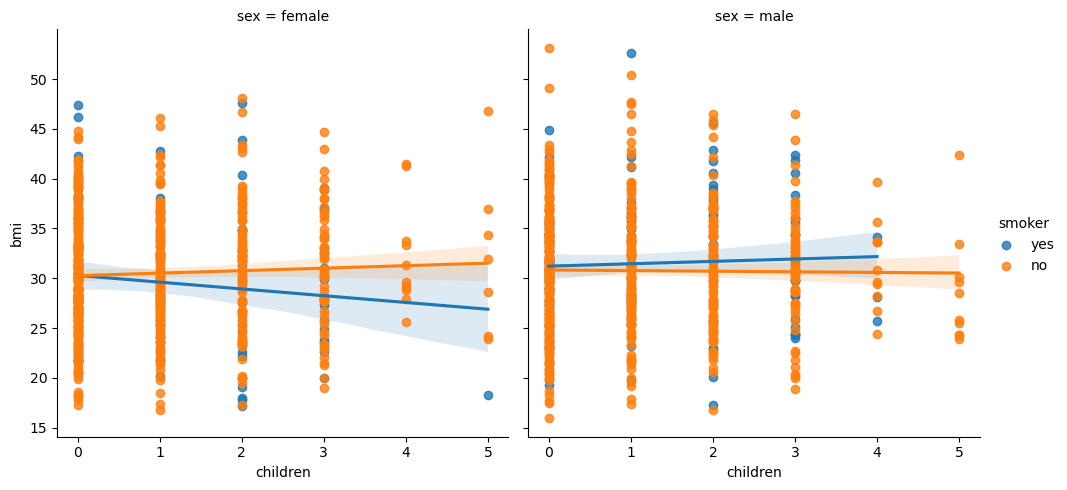

In [26]:
sns.lmplot(x="children", y="bmi", hue="smoker",col="sex",height=5,data = df)

Burda amaçladığımızın dışında bir bilgi öğrendik, bmi ile çocuk sayısı arasındaki ilişkiden daha çok sigara içen kadınların çocuğu arttıkça zayıfladığını görüyoruz. İlginç bir sonuç elde ettik.

### ○ Is there an outlier in the "bmi" variable? Please review.

Öncelikle aykırı değer olarak kabul edeceğimiz şeyin ne olduğunu bilmek gerekir. Aykırı değeri biz incelediğimiz verideki topluluğun ortalama bmi'sinden çok yukarıda yada aşağıdaki değerleride kabul edebiliriz. Bireylerin sağlıklı olup olmamasına görede kabul edebiliriz. Biz burada incelediğimiz topluluğun sahip olduğu ortalamanın dışındakileri aykırı değer olarak kabul edeceğiz.

#### **Box Plot (Kutu Grafiği)**

 Box plot grafiği, veri setinin istatistiksel dağılımını gösterir ve aykırı değerleri belirlemeye yardımcı olabilir. Aykırı değerler genellikle kutu grafiğinde alt ve üst çeyreklerin dışında kalan noktalar olarak görülebilir.

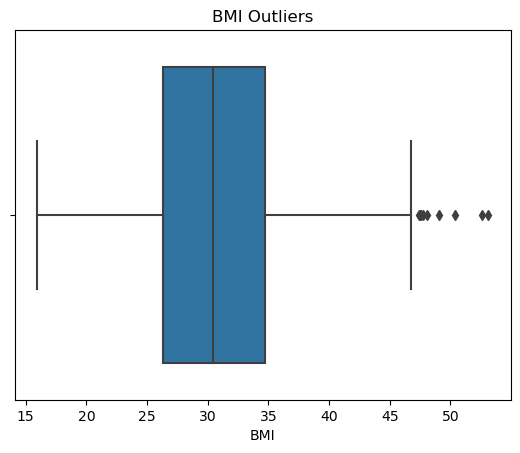

In [27]:
sns.boxplot(x=df['bmi'])
plt.xlabel('BMI')
plt.title('BMI Outliers')
plt.show()

#### **IQR (Interquartile Range) Method**
Bu yöntemde verilerin çeyrekler arası aralığı (IQR) kullanılarak aykırı değerleri belirlemek mümkündür. Alt ve üst sınırlar hesaplanır ve bu sınırların dışındaki değerler aykırı olarak kabul edilir.

In [28]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df[(df['bmi'] < lower_limit) | (df['bmi'] > upper_limit)]

,age,sex,bmi,children,smoker,region,charges,bmi_group
116,58,male,49.06,0,no,southeast,11381.32540,35++ aşırı obez
286,46,female,48.07,2,no,northeast,9432.92530,35++ aşırı obez
401,47,male,47.52,1,no,southeast,8083.91980,35++ aşırı obez
543,54,female,47.41,0,yes,southeast,63770.42801,35++ aşırı obez
847,23,male,50.38,1,no,southeast,2438.05520,35++ aşırı obez
860,37,female,47.60,2,yes,southwest,46113.51100,35++ aşırı obez
1047,22,male,52.58,1,yes,southeast,44501.39820,35++ aşırı obez
1088,52,male,47.74,1,no,southeast,9748.91060,35++ aşırı obez
1317,18,male,53.13,0,no,southeast,1163.46270,35++ aşırı obez


In [29]:
IQR

8.3975

#### **Z-Score Method**

Bu yöntemde her bir veri noktasının standart sapma cinsinden uzaklığı hesaplanır. Belirli bir eşik değerinden büyük veya küçük olan veriler aykırı olarak kabul edilir.


In [30]:
from scipy import stats

z_scores = stats.zscore(df['bmi'])
df[(z_scores < -3) | (z_scores > 3)]


,age,sex,bmi,children,smoker,region,charges,bmi_group
116,58,male,49.06,0,no,southeast,11381.3254,35++ aşırı obez
847,23,male,50.38,1,no,southeast,2438.0552,35++ aşırı obez
1047,22,male,52.58,1,yes,southeast,44501.3982,35++ aşırı obez
1317,18,male,53.13,0,no,southeast,1163.4627,35++ aşırı obez


### ○ Examine the relationship between “bmi” and “charges”.

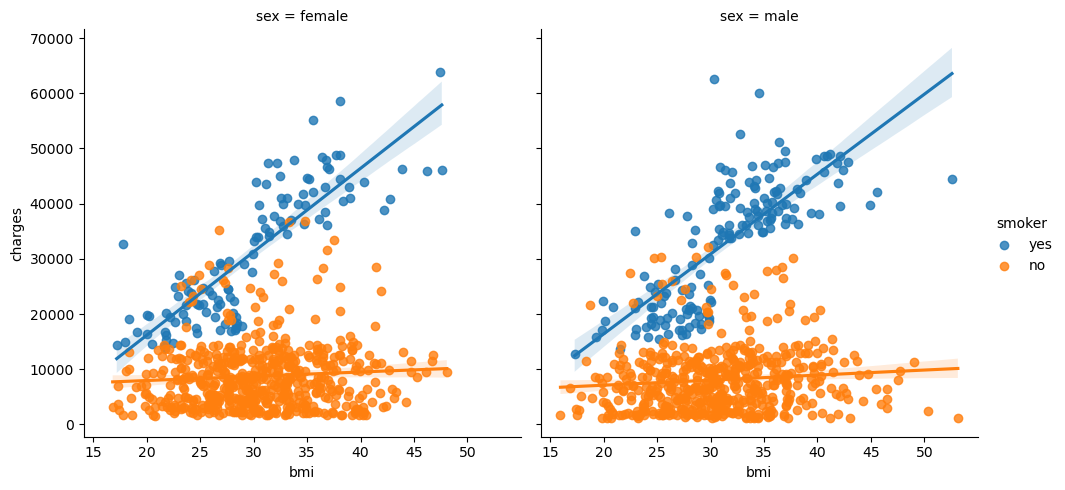

In [31]:
sns.lmplot(x="bmi", y="charges", hue="smoker",col="sex",data = df)

Yukarıdaki modelden;
* sigara içen insanların içmeyenlere göre daha fazla sağlık problemi yaşadığını söylemek mümkün. 
* Kilolu insanlarında normal kilodaki insanlara göre daha fazla sağlık harcaması olduğunu söylemek mümkün.

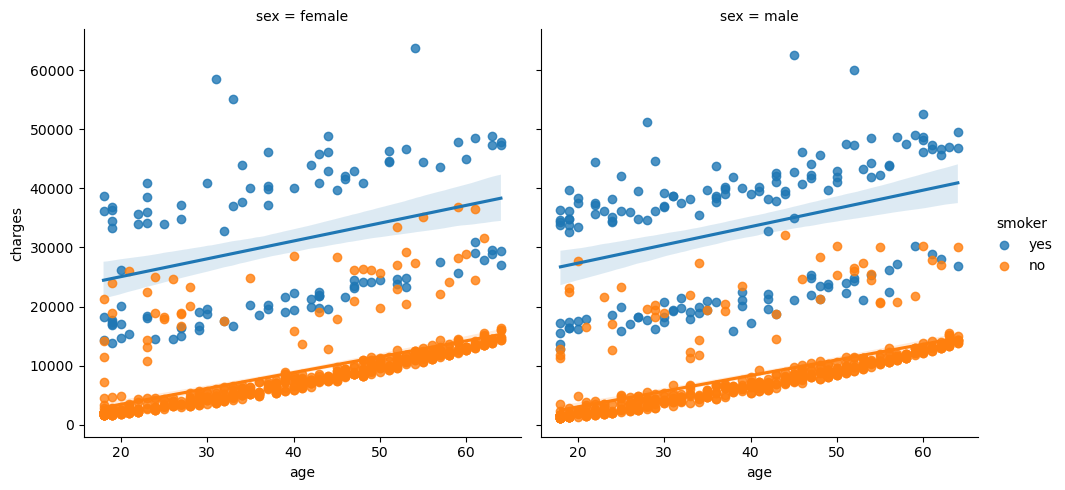

In [32]:
sns.lmplot(x="age", y="charges", hue="smoker",col="sex",data = df)

### ○ Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

<Axes: xlabel='bmi', ylabel='region'>

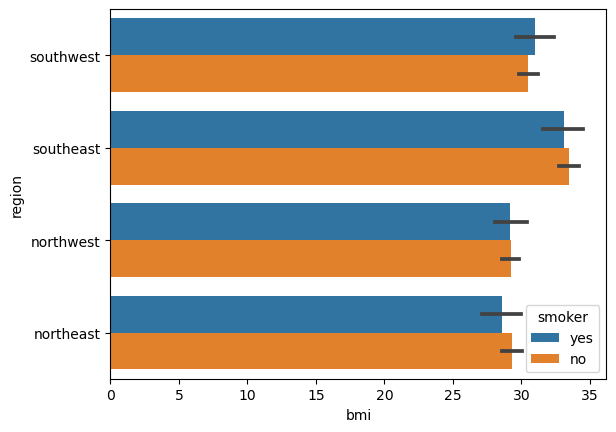

In [33]:
sns.barplot(x="bmi", y="region", hue="smoker", data = df)

Güneyde yaşayan insanların kuzeydekilere nazaran daha kilolu olduklarını söylemek mümkün

## 4. Data Preprocessing

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

#### ● **LABEL ENCODING**

Label Encoding: Label Encoding, kategorik değişkenleri ardışık sayılara dönüştürür. Sıralı veya sırasız kategorik değişkenleri dönüştürmek için kullanılır. Ancak, bu yöntem modelin kategoriler arasında yanıltıcı bir sıralama olduğunu düşünmesine neden olabilir. Cinsiyet gibi iki kategorili bir değişken Label Encoding ile dönüştürülebilir.

In [35]:
label_encoder = LabelEncoder()
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_group,sex_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,25-30 kilolu,0
1,18,male,33.770,1,no,southeast,1725.55230,30-35 obez,1
2,28,male,33.000,3,no,southeast,4449.46200,30-35 obez,1
3,33,male,22.705,0,no,northwest,21984.47061,18-25 normal,1
4,32,male,28.880,0,no,northwest,3866.85520,25-30 kilolu,1


In [36]:
label_encoder = LabelEncoder()
df['smoker_encoded'] = label_encoder.fit_transform(df['smoker'])
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_group,sex_encoded,smoker_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,25-30 kilolu,0,1
1,18,male,33.770,1,no,southeast,1725.55230,30-35 obez,1,0
2,28,male,33.000,3,no,southeast,4449.46200,30-35 obez,1,0
3,33,male,22.705,0,no,northwest,21984.47061,18-25 normal,1,0
4,32,male,28.880,0,no,northwest,3866.85520,25-30 kilolu,1,0


#### ● **One-Hot Encoding**

One-Hot Encoding, her kategoriye ayrı bir sütun oluşturarak kategorik değişkenleri dönüştürür. Bu yöntem, sırasız kategorik değişkenleri dönüştürmek için daha iyi bir seçenektir, çünkü herhangi bir sıralama varsayımı yapmaz. Örneğin, bölgeler ve sigara içme durumu gibi değişkenler One-Hot Encoding ile dönüştürülebilir.

Kategorik sütunlara One-Hot Encoding uygulayarak, modelin kategorik verileri daha iyi anlamasını ve kullanmasını sağlamak istiyoruz. Kategorik değişkenler, doğrudan sayısal değil, metinsel veya sembolik değerler içerir. Birçok makine öğrenimi algoritması, bu tür kategorik verileri anlamakta zorlanabilir veya hatalı sonuçlar verebilir. Bu nedenle kategorik değişkenleri modele girdi olarak kullanmadan önce sayısal değerlere dönüştürmemiz gerekmektedir.

One-Hot Encoding, kategorik değişkenleri sayısal forma dönüştüren bir yöntemdir. Her bir kategori ayrı bir sütun olarak temsil edilir ve her satırda sadece bir sütun 1 (var) ve diğer sütunlar 0 (yok) değeri alır. Bu sayede model, kategoriler arasında herhangi bir sıralama veya ilişki varsayımı yapmadan veriyi daha iyi anlayabilir.

Örneğin, "region" değişkenini ele alalım. Bu değişken "southwest", "southeast", "northwest" ve "northeast" gibi dört farklı kategoriye sahip olabilir. One-Hot Encoding ile her bir kategori ayrı bir sütun olarak temsil edilir ve her satırda sadece bir sütun 1 değeri alırken diğer sütunlar 0 değeri alır. Bu şekilde, model her bir bölgeyi ayrı ayrı ele alabilir ve kategorik veriyi daha iyi kullanabilir

In [37]:
# pandas'ın get_dummies fonksiyonu ile One-Hot Encoding yapiyoruz
region_encoded = pd.get_dummies(df['region'], prefix='region', drop_first=True)

# Oluşturulan One-Hot Encoding sütunları ana veri setine ekliyoruz
df_encoded = pd.concat([df, region_encoded], axis=1)

# One-Hot Encoding sütunları ekledikten sonra orijinal "region" sütununu çıkarın
df_encoded = df_encoded.drop('region', axis=1)

df_encoded

,age,sex,bmi,children,smoker,charges,bmi_group,sex_encoded,smoker_encoded,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,25-30 kilolu,0,1,0,0,1
1,18,male,33.770,1,no,1725.55230,30-35 obez,1,0,0,1,0
2,28,male,33.000,3,no,4449.46200,30-35 obez,1,0,0,1,0
3,33,male,22.705,0,no,21984.47061,18-25 normal,1,0,1,0,0
4,32,male,28.880,0,no,3866.85520,25-30 kilolu,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,30-35 obez,1,0,1,0,0
1334,18,female,31.920,0,no,2205.98080,30-35 obez,0,0,0,0,0
1335,18,female,36.850,0,no,1629.83350,35++ aşırı obez,0,0,0,1,0
1336,21,female,25.800,0,no,2007.94500,25-30 kilolu,0,0,0,0,1


Kategorik değişkenlerimizi sayısal değişkenlere çevirdik. Şimdi çevirmediğimiz "sex" "bmi_group" ve "smoker" sütunlarınıda veri setimizden silelim

 One-Hot Encoding yaparken kategorik bir değişkeni ayrı sütunlara böldüğümüzde, orijinal kategorik değişkeni veri setinden çıkarabiliriz. Çünkü ayrı sütunlar olarak oluşturulan yeni değişkenler zaten orijinal değişkenin bilgisini içerir. Bu şekilde veri seti daha temiz ve düzenli hale gelir. Orijinal değişkeni veri setinden çıkarmak, modelin gereksiz bilgiye maruz kalmasını önler ve performansı artırabilir.

In [38]:
 df_encoded = df_encoded.drop(['bmi_group', 'sex', 'smoker'], axis=1)

df_encoded.head(10)

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
5,31,25.740,0,3756.62160,0,0,0,1,0
6,46,33.440,1,8240.58960,0,0,0,1,0
7,37,27.740,3,7281.50560,0,0,1,0,0
8,37,29.830,2,6406.41070,1,0,0,0,0
9,60,25.840,0,28923.13692,0,0,1,0,0


Aynı kodu iki kere çalıştırdığım için silinmiyor haliyle hata aldım ama sorun yok veri setimiz hazır gözüküyor.

#### ● **AYKIRI DEĞERLERİ BASKILAYALIM (Capping/Flooring)**


In [39]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df[(df['charges'] < lower_limit) | (df['charges'] > upper_limit)]

,age,sex,bmi,children,smoker,region,charges,bmi_group,sex_encoded,smoker_encoded
14,27,male,42.130,0,yes,southeast,39611.75770,35++ aşırı obez,1,1
19,30,male,35.300,0,yes,southwest,36837.46700,35++ aşırı obez,1,1
23,34,female,31.920,1,yes,northeast,37701.87680,30-35 obez,0,1
29,31,male,36.300,2,yes,southwest,38711.00000,35++ aşırı obez,1,1
30,22,male,35.600,0,yes,southwest,35585.57600,35++ aşırı obez,1,1
...,...,...,...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309,30-35 obez,1,1
1301,62,male,30.875,3,yes,northwest,46718.16325,30-35 obez,1,1
1303,43,male,27.800,0,yes,southwest,37829.72420,25-30 kilolu,1,1
1313,19,female,34.700,2,yes,southwest,36397.57600,30-35 obez,0,1


Yukarıda gözüktüğü gibi charges değişkenine ait tam 139 tane farklı aykırı değer bulunmakta. Şimdi biz bu aykırı değerleri bulduğumuz eşik değerlerine eşitleyerek sınırlama işlemi yapacağız. 

In [40]:
Q1

4740.28715

Aykırı değerimizin alt eşiği

In [41]:
Q3

16639.912515

Aykırı değerimizin üst eşiği

In [42]:
IQR

11899.625365

In [43]:
Q1 = 4740.28715
Q3 = 16639.912515
IQR = 11899.625365

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerleri baskıla
df["charges"] = np.clip(df["charges"], lower_bound, upper_bound)
# Bakalım yazdığımız kod sınırlama yapmış mı test edelim şimdi
df[(df['charges'] < lower_limit) | (df['charges'] > upper_limit)]

,age,sex,bmi,children,smoker,region,charges,bmi_group,sex_encoded,smoker_encoded


Gözüktüğü gibi charges değişkenine ait aykırı değerleri baskıladık yani alt ve üst eşik olan değerleri yazdık onların yerine. Bundan dolayı hiçbirşekilde bu değerler arasında bir değer belirten veri çıkmıyor artık karşımıza. Şimdi aynı işlemleri "bmi" için gerçekleştirelim.

In [44]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR


df["bmi"] = np.clip(df["bmi"], lower_limit, upper_limit)
df[(df['bmi'] < lower_limit) | (df['bmi'] > upper_limit)]

,age,sex,bmi,children,smoker,region,charges,bmi_group,sex_encoded,smoker_encoded


bmi değişkenimizide baskıladık

#### ● **Bağımlı ve bağımsız değişkenleri ayırma:**

**Bağımsız Değişkenler (X):**<br>

* bmi<br>
* age<br>
* children<br>
* sex_encoded<br>
* region_northwest<br>
* region_southeast<br>
* region_southwest


**Bağımlı Değişken (y):**

* charges<br>

Bağımsız değişkenler modelinizi eğitirken kullandığınız değişkenlerdir. Bağımlı değişken ise tahminlemeye çalıştığınız hedeftir.

In [45]:
# Bağımsız değişkenler (X)
X = df_encoded[['bmi', 'age', 'children', 'sex_encoded', 'smoker_encoded', 'region_northwest', 'region_southeast', 'region_southwest']]

# Bağımlı değişken (y)
y = df_encoded['charges']


In [46]:
X

,bmi,age,children,sex_encoded,smoker_encoded,region_northwest,region_southeast,region_southwest
0,27.900,19,0,0,1,0,0,1
1,33.770,18,1,1,0,0,1,0
2,33.000,28,3,1,0,0,1,0
3,22.705,33,0,1,0,1,0,0
4,28.880,32,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,30.970,50,3,1,0,1,0,0
1334,31.920,18,0,0,0,0,0,0
1335,36.850,18,0,0,0,0,1,0
1336,25.800,21,0,0,0,0,0,1


Yukarıda bağımsız değişkenlerimizi görüyoruz.

In [47]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Bağımlı değişkenimizide burada görüyoruz.

#### ● **Veri setini eğitim ve test kümelerine bölme:**


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Bu kod, veriyi %80 eğitim ve %20 test olarak böler. 

X_train: Bu, bağımsız değişkenlerin (özelliklerin) eğitim veri kümesidir. Modelinizi eğitmek için kullanacağınız verileri içerir. Genellikle özellikleri içeren bir veri çerçevesidir.

X_test: Bu, bağımsız değişkenlerin (özelliklerin) test veri kümesidir. Modelinizi test etmek için kullanacağınız verileri içerir. Modeli eğittikten sonra gerçek dünya verilerine nasıl tepki verdiğini değerlendirmek için kullanılır.

y_train: Bu, bağımlı değişkenin (hedef değişkenin) eğitim veri kümesidir. Modelinizi eğitirken, bu bağımsız değişkenlerin karşılık gelen hedef değerlerini içerir.

y_test: Bu, bağımlı değişkenin (hedef değişkenin) test veri kümesidir. Modelinizi test ederken, gerçek dünya verileriyle karşılaştırmak ve modelin performansını değerlendirmek için kullanılır.

In [49]:
X_test.head()

,bmi,age,children,sex_encoded,smoker_encoded,region_northwest,region_southeast,region_southwest
764,25.175,45,2,0,0,0,0,0
887,30.020,36,0,0,0,1,0,0
890,26.885,64,0,0,1,1,0,0
1293,25.745,46,3,1,0,1,0,0
259,31.920,19,0,1,1,1,0,0


In [50]:
X_train.head()

,bmi,age,children,sex_encoded,smoker_encoded,region_northwest,region_southeast,region_southwest
560,19.95,46,2,0,0,1,0,0
1285,24.32,47,0,0,0,0,0,0
1142,24.86,52,0,0,0,0,1,0
969,34.32,39,5,0,0,0,1,0
486,21.47,54,3,0,0,1,0,0


In [51]:
y_train.head()

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64

In [52]:
y_test.head()

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
Name: charges, dtype: float64

#### ● **Veri setini ölçeklendirme:**

Veri ölçeklendirme işlemi, verileri farklı aralıklardan aynı aralığa getirerek modelin daha iyi performans göstermesine yardımcı olur. İki yaygın ölçeklendirme yöntemi Min-Max Scaling ve Standard Scaling'dir. 

* **Min-Max Scaling (Normalizasyon):**

Bu yöntem verileri [0, 1] aralığına ölçeklendirir. Verinin minimum ve maksimum değerleri kullanılarak her bir özellik için aşağıdaki formül uygulanır:<br>
X_scaled = (X - X_min) / (X_max - X_min)

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


* **Standard Scaling (Standartlaştırma):**

Bu yöntem verileri ortalaması 0, standart sapması 1 olacak şekilde ölçeklendirir. Her bir özellik için aşağıdaki formül uygulanır:<br>
X_scaled = (X - mean) / std

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Model Selection

#### ● **Linear Regression:**


In [55]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

Bu kodlar, bir lineer regresyon modeli oluşturmanızı ve bu modeli verilerinizi kullanarak eğitmenizi sağlar.

İşleyişi şu şekildedir:

LinearRegression() ile bir lineer regresyon modeli oluşturursunuz. Bu model, verilerinizi temel alarak lineer ilişkileri öğrenmeye çalışacaktır.
fit(X_train_scaled, y_train) ile oluşturduğunuz modeli eğitirsiniz. X_train_scaled bağımsız değişkenlerin eğitim verisi ve y_train ise bu bağımsız değişkenlerin karşılık gelen bağımlı değişken değerleridir. Model, bu verileri kullanarak bağımlı değişkeni tahmin etmek için katsayıları ayarlar.
Sonuç olarak, bu kodlar eğitilmemiş bir lineer regresyon modeli oluşturmanıza ve veri kümesini kullanarak bu modeli eğitmenize yardımcı olur. Eğittikten sonra, bu modeli kullanarak yeni veriler için tahminler yapabilirsiniz.

In [56]:
linear_model.intercept_

13346.089736364485

linear_model.intercept_, bir lineer regresyon modelinin kesme noktasını (yani doğruyun y eksenini kestiği noktayı) temsil eden bir özniteliktir. Lineer regresyon modeli, genellikle bir doğru şeklinde ifade edilir:<br>
y = mx + b<br>
Burada m eğim (slope) ve b kesme noktası (intercept) olarak adlandırılır. linear_model.intercept_ ifadesi, eğitilmiş bir lineer regresyon modelinin b değerini ifade eder.
Bu değer, veri setindeki bağımsız değişkenlerin 0 olduğu durumda tahmin edilen bağımlı değişkenin değerini temsil eder.<br>
Bu bağlamda, 13346.089736364485 değeri, bağımlı değişkeniniz (muhtemelen "charges") için sıfır bağımsız değişken değerleri durumunda tahmin edilen bir değerdir.

In [57]:
linear_model.coef_

array([ 2.03622812e+03,  3.61497541e+03,  5.16890247e+02, -9.29310107e+00,
        9.55848141e+03, -1.58140981e+02, -2.90157047e+02, -3.49110678e+02])

Verilen katsayılar, bağımsız değişkenlerin bağımlı değişken üzerindeki etkilerini göstermektedir. Pozitif katsayılar, ilgili bağımsız değişkenin artmasıyla bağımlı değişkenin de artacağını, negatif katsayılar ise ilgili bağımsız değişkenin artmasıyla bağımlı değişkenin azalacağını ifade eder.

linear_model.coef_, bir lineer regresyon modelinin katsayılarını temsil eden bir özniteliktir. Lineer regresyon modeli, bağımsız değişkenlerin (X) katsayılarını ifade eder ve genellikle şu şekilde ifade edilir:<br>
y = b0 + b1*x1 + b2*x2 + ... + bn*xn <br>
Burada b0 kesme noktası (intercept), b1, b2, ..., bn bağımsız değişkenlerin katsayılarıdır. linear_model.coef_ ifadesi, eğitilmiş bir lineer regresyon modelinin bağımsız değişkenlerin katsayılarını ifade eder.

Bu değerler, bağımsız değişkenlerin bağımlı değişken üzerindeki etkilerini gösterir. Her bir katsayı, ilgili bağımsız değişkenin bir birim değişimi ile bağımlı değişkenin ne kadar değişeceğini gösterir.

In [58]:
X_test

,bmi,age,children,sex_encoded,smoker_encoded,region_northwest,region_southeast,region_southwest
764,25.175,45,2,0,0,0,0,0
887,30.020,36,0,0,0,1,0,0
890,26.885,64,0,0,1,1,0,0
1293,25.745,46,3,1,0,1,0,0
259,31.920,19,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...
109,35.090,63,0,1,1,0,1,0
575,27.170,58,0,0,0,1,0,0
535,28.025,38,1,1,0,0,0,0
543,47.410,54,0,0,1,0,1,0


**MODELİN TAHMİNLERİNİ YAPTIRMAK VE DOĞRULUĞUNU ANALİZ ETMEK**


In [59]:
y_pred = linear_model.predict(X_test_scaled)
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted Charges"])
y_pred_df

,Predicted Charges
0,8969.550274
1,7068.747443
2,36858.410912
3,9454.678501
4,26973.173457
...,...
263,39061.500932
264,11761.499198
265,7687.563632
266,40920.291512


Tahmin değerleri ve gerçek değerleri bir dataframe haline getirdim birazdan ikisini birleştirip gerçek değerler ve tahmin değerlerini yan yana koyacağım bu sayede ne kadar doğru olup olmadıklarını inceleme fırsatım olacak.

In [60]:
y_test_copy = pd.Series(y_test)
y_test_copy.reset_index(drop=True, inplace=True)
y_test_copy_df = pd.DataFrame(y_test_copy)
new_column_name = {'charges': 'Actual Charges'}
y_test_copy_df.rename(columns=new_column_name, inplace=True)
y_test_copy_df


,Actual Charges
0,9095.06825
1,5272.17580
2,29330.98315
3,9301.89355
4,33750.29180
...,...
263,47055.53210
264,12222.89830
265,6067.12675
266,63770.42801


In [61]:
comparison_df = pd.concat([y_test_copy_df, y_pred_df], axis=1)
comparison_df

,Actual Charges,Predicted Charges
0,9095.06825,8969.550274
1,5272.17580,7068.747443
2,29330.98315,36858.410912
3,9301.89355,9454.678501
4,33750.29180,26973.173457
...,...,...
263,47055.53210,39061.500932
264,12222.89830,11761.499198
265,6067.12675,7687.563632
266,63770.42801,40920.291512


Aşağıdaki ve yukarıdaki tabloları incelediğimiz zaman modelimizin mükemmel olmasa bile kayda değer bir tahminde bulunduğunu söylemek mümkün. Doğuruluk oranını ise aşağıdaki metriklerle ölçüp ne kadar doğru yapıp yapmadığımız konusunda daha fazla fikir sahibi olmaya çalışacağız. 

In [62]:
comparison_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Actual Charges,268.0,12968.317063,12483.196202,1131.506600,4288.744850,8487.880300,16367.829375,63770.428010
Predicted Charges,268.0,13187.557732,10761.975104,-1545.571849,5439.137333,10171.706374,15104.702196,40920.291512


**Ortalama Kare Hata (Mean Squared Error, MSE)**

Gerçek değerler ile tahmin değerler arasındaki farkların karesinin ortalamasıdır. Daha büyük hatalar daha yüksek ağırlığa sahip olur.

In [63]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 33596915.851361476


**Ortalama Mutlak Hata (Mean Absolute Error, MAE)**

Gerçek değerler ile tahmin değerler arasındaki mutlak farkların ortalamasıdır. MSE'ye göre daha az duyarlıdır.
* MAE ne kadar düşükse, modelin tahminleri gerçek değerlere daha yakındır. 

In [64]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)


4181.1944737536505

**Ortalama Mutlak Yüzde Hata (Mean Absolute Percentage Error, MAPE)**

Gerçek değerlere göre tahmin değerlerinin yüzde cinsinden mutlak farklarının ortalamasıdır. Tahmin değerlerin büyüklüğüne göre ölçeklendirilmiştir.
* MAPE ne kadar düşükse, modelin tahminleri gerçek değerlere daha yakındır. 

In [65]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# y_test: Gerçek değerler
# y_pred: Tahmin edilen değerler
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Absolute Percentage Error:", mape)


Mean Absolute Percentage Error: 46.888255979146976


**MR-kare (R-squared, Coefficient of Determination):**

Gerçek değerlerin varyansının ne kadarının tahmin değerlerle açıklanabildiğini gösterir. 
* 0 ile 1 arasında değer alır. 1'e yaklaştıkça modelin daha iyi uydurduğunu ifade eder.

In [66]:
from sklearn.metrics import r2_score

# y_test: Gerçek değerler
# y_pred: Tahmin edilen değerler
r2 = r2_score(y_test, y_pred)

print("R-squared (R²) Score:", r2)

R-squared (R²) Score: 0.7835929767120722


**Medyan Mutlak Hata (Median Absolute Error)**

 Gerçek değerler ile tahmin değerler arasındaki mutlak farkların medyanını ifade eder. Aykırı değerlere karşı daha dayanıklıdır.
 * Median Absolute Error değeri ne kadar düşükse, modelin tahminleri gerçek değerlere daha yakın demektir.

In [67]:
from sklearn.metrics import median_absolute_error

# y_test: Gerçek değerler
# y_pred: Tahmin edilen değerler
median_absolute_err = median_absolute_error(y_test, y_pred)

print("Median Absolute Error:", median_absolute_err)


Median Absolute Error: 2695.1394630391087


**İyileştirilmiş R-kare (Adjusted R-squared)**

R-kare'nin bir varyasyonudur ve modelin bağımsız değişkenlerden kaçının varyansını açıkladığını düzeltir.

Modeldeki ekstra bağımsız değişkenlerin açıkladığı varyansın, toplam varyansa oranını hesaplar. Bu skor, modeldeki bağımsız değişken sayısını da dikkate alarak daha objektif bir performans ölçüsü sunar. 

In [68]:
def adjusted_r_squared(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

# r2: R² skoru
# n: Veri sayısı
# k: Bağımsız değişken sayısı
adjusted_r2 = adjusted_r_squared(r2, len(y_test), X_test.shape[1])

print("Adjusted R-squared:", adjusted_r2)


Adjusted R-squared: 0.7769085898923679


#### ● **Decision Tree Regression:**


In [69]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

**MODELİN TAHMİNLERİNİ YAP**

In [70]:
X_test

,bmi,age,children,sex_encoded,smoker_encoded,region_northwest,region_southeast,region_southwest
764,25.175,45,2,0,0,0,0,0
887,30.020,36,0,0,0,1,0,0
890,26.885,64,0,0,1,1,0,0
1293,25.745,46,3,1,0,1,0,0
259,31.920,19,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...
109,35.090,63,0,1,1,0,1,0
575,27.170,58,0,0,0,1,0,0
535,28.025,38,1,1,0,0,0,0
543,47.410,54,0,0,1,0,1,0


In [71]:
y_pred_tree = linear_model.predict(X_test_scaled)
y_pred_tree_df = pd.DataFrame(y_pred_tree, columns=["Predicted Charges"])
y_pred_tree_df

,Predicted Charges
0,8969.550274
1,7068.747443
2,36858.410912
3,9454.678501
4,26973.173457
...,...
263,39061.500932
264,11761.499198
265,7687.563632
266,40920.291512


In [72]:
y_test_copy = pd.Series(y_test)
y_test_copy.reset_index(drop=True, inplace=True)
y_test_copy_df = pd.DataFrame(y_test_copy)
new_column_name = {'charges': 'Actual Charges'}
y_test_copy_df.rename(columns=new_column_name, inplace=True)
y_test_copy_df

,Actual Charges
0,9095.06825
1,5272.17580
2,29330.98315
3,9301.89355
4,33750.29180
...,...
263,47055.53210
264,12222.89830
265,6067.12675
266,63770.42801


In [73]:
comparison_df = pd.concat([y_test_copy_df, y_pred_tree_df], axis=1)
comparison_df

,Actual Charges,Predicted Charges
0,9095.06825,8969.550274
1,5272.17580,7068.747443
2,29330.98315,36858.410912
3,9301.89355,9454.678501
4,33750.29180,26973.173457
...,...,...
263,47055.53210,39061.500932
264,12222.89830,11761.499198
265,6067.12675,7687.563632
266,63770.42801,40920.291512


**BURDAKİ DEĞERLER LİNEER REGRESYON MODELİMİZ İLE NERDEYSE AYNI DURUYOR**

In [74]:
comparison_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Actual Charges,268.0,12968.317063,12483.196202,1131.506600,4288.744850,8487.880300,16367.829375,63770.428010
Predicted Charges,268.0,13187.557732,10761.975104,-1545.571849,5439.137333,10171.706374,15104.702196,40920.291512


**Ortalama Kare Hata (Mean Squared Error, MSE)**

In [75]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred_tree)
print("Mean Squared Error:", mse)


Mean Squared Error: 33596915.851361476


**Ortalama Mutlak Hata (Mean Absolute Error, MAE)**

In [76]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred_tree)


4181.1944737536505

**Ortalama Mutlak Yüzde Hata (Mean Absolute Percentage Error, MAPE)**

In [77]:
def mean_absolute_percentage_error(y_true, y_pred_tree):
    y_true, y_pred_tree = np.array(y_true), np.array(y_pred_tree)
    return np.mean(np.abs((y_true - y_pred_tree) / y_true)) * 100

# y_test: Gerçek değerler
# y_pred: Tahmin edilen değerler
mape = mean_absolute_percentage_error(y_test, y_pred_tree)

print("Mean Absolute Percentage Error:", mape)


Mean Absolute Percentage Error: 46.888255979146976


**MR-kare (R-squared, Coefficient of Determination):**

In [78]:
from sklearn.metrics import r2_score

# y_test: Gerçek değerler
# y_pred: Tahmin edilen değerler
r2 = r2_score(y_test, y_pred_tree)

print("R-squared (R²) Score:", r2)

R-squared (R²) Score: 0.7835929767120722


**Medyan Mutlak Hata (Median Absolute Error)**

In [79]:
from sklearn.metrics import median_absolute_error

# y_test: Gerçek değerler
# y_pred: Tahmin edilen değerler
median_absolute_err = median_absolute_error(y_test, y_pred_tree)

print("Median Absolute Error:", median_absolute_err)


Median Absolute Error: 2695.1394630391087


**İyileştirilmiş R-kare (Adjusted R-squared)**

In [80]:
def adjusted_r_squared(y_true, y_pred_tree, n_features):
    n_samples = len(y_true)
    r_squared = 1 - (sum((y_true - y_pred_tree) ** 2) / (n_samples - 1)) / (sum((y_true - y_true.mean()) ** 2) / (n_samples - n_features))
    adjusted_r2 = 1 - (1 - r_squared) * (n_samples - 1) / (n_samples - n_features - 1)
    return adjusted_r2

# İyileştirilmiş R-kare değerini hesapla
adj_r2_tree = adjusted_r_squared(y_test, y_pred_tree, X_test_scaled.shape[1])

print("Adjusted R-squared for Decision Tree Regression:", adj_r2_tree)


Adjusted R-squared for Decision Tree Regression: 0.7827574283596093


#### ● **ÇAPRAZ DOĞRULAMA**


**Lineer Regresyon**

In [81]:
from sklearn.model_selection import cross_val_score

# Modeli belirleyelim (örneğin, Linear Regression modelini kullanıyoruz)
model = LinearRegression()

# Çapraz doğrulama işlemini uyguluyoruz
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)  # 5-fold çapraz doğrulama
scores

array([0.71585461, 0.80210564, 0.72296123, 0.65784333, 0.76678575])

In [82]:
scores.mean()

0.7331101109097584

# **%73.31 doğru tahmin oranına sahip bir modelin olduğunu söyleyebiliriz**

In [83]:
scores.std()

0.048908631587897385

# **0.7331 ile ortalama olarak 0.0489 standart sapma değeri ile bu modelin çapraz doğrulama sonuçlarının genellikle ortalama değer etrafında ±0.0489 aralığında değiştiği söylenebilir.**

## Aşağıda bizim uyguladığımız regresyon modelleri dışında 2 model daha var fakat bunlarla inceleme yapılmadı

#### ● **Random Forest Regression:**


In [84]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()
forest_model.fit(X_train_scaled, y_train)

RandomForestRegressor()

#### ● **Gradient Boosting Regression:**


In [85]:
from sklearn.ensemble import GradientBoostingRegressor

boosting_model = GradientBoostingRegressor()
boosting_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor()